# Plotting and Visualization Tutorial

This tutorial covers creating publication-ready plots and visualizations for LineageVI analysis results.


In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import lineagevi
from lineagevi import LineageVI
import numpy as np
import torch

In [37]:
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/inputs/anndata/processed/pancreas.h5ad')

In [38]:
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas/vae_velocity_model.pt'

linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)

In [39]:
linvi.get_model_outputs(
    adata=adata,
    n_samples=100,
    return_mean=True,
    return_negative_velo=True,
    base_seed=0,
    save_to_adata=True,
    unspliced_key='Mu',
    spliced_key='Ms',
    latent_key='z',
    nn_key='indices'
)

In [40]:
adata_gp = lineagevi.utils.build_gp_adata(
    adata,
    model=linvi,
    n_samples=100,
    return_negative_velo=True,
    base_seed=0
)

AttributeError: 'LineageVI' object has no attribute '_get_model_outputs'

In [ ]:
adata_gp

AnnData object with n_obs × n_vars = 3696 × 689
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    obsm: 'X_umap'
    layers: 'Ms', 'z', 'logvar', 'velocity'

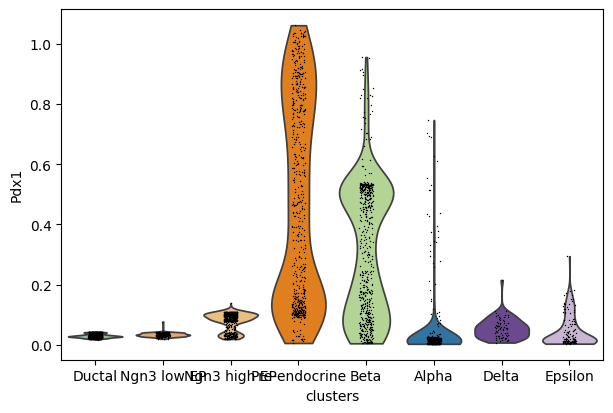

In [ ]:
sc.pl.violin(adata, keys='Pd', layer='alpha', groupby='clusters')

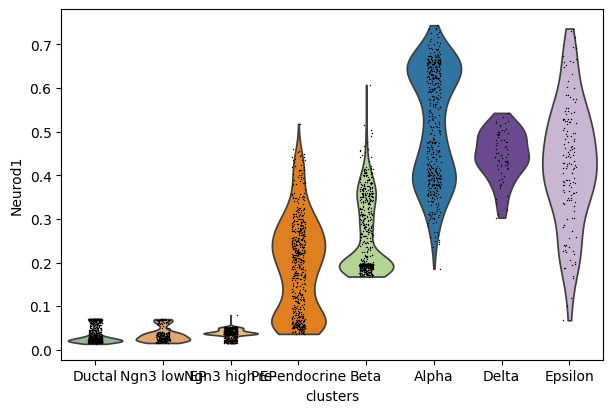

In [ ]:
sc.pl.violin(adata, keys='Pdx1', layer='beta', groupby='clusters')

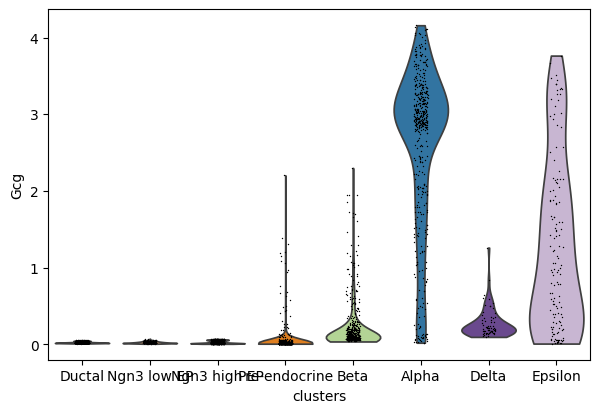

In [ ]:
sc.pl.violin(adata, keys='Gcg', layer='alpha', groupby='clusters')

In [ ]:
lineagevi.plots.top_features_table(adata, celltype_key="clusters", categories="Beta", layer="velocity", n=10)

,gp,mean_activation,Beta mean
1,Ntm,1.455021,1.455021
2,Sntg1,1.425810,1.425810
3,Npy,1.405649,1.405649
4,Aff1,1.227253,1.227253
5,Magi2,1.224598,1.224598
6,Mcc,1.155074,1.155074
7,Sdk2,1.154118,1.154118
8,Slc24a2,1.148952,1.148952
9,Cntfr,1.126088,1.126088
10,Itpkb,1.122910,1.122910


In [ ]:
lineagevi.plots.top_features_table(adata, celltype_key="clusters", categories=["Ductal", 'Beta'], layer="velocity", n=30)

,gp,mean_activation,Ductal mean,Beta mean
1,Wwox,-0.666342,-0.588960,-0.786277
2,Cdkn3,0.612024,1.007977,-0.001669
3,Airn,-0.605641,-0.783702,-0.329660
4,Ntm,0.596320,0.042290,1.455021
5,Cdc25c,0.595086,0.981272,-0.003467
6,Cdc20,0.586821,0.970647,-0.008078
7,Ccnb1,0.582437,0.966861,-0.013385
8,Cenpf,0.577667,0.958335,-0.012336
9,Nde1,0.575824,0.963414,-0.024909
10,Kpna2,0.563004,0.964485,-0.059258


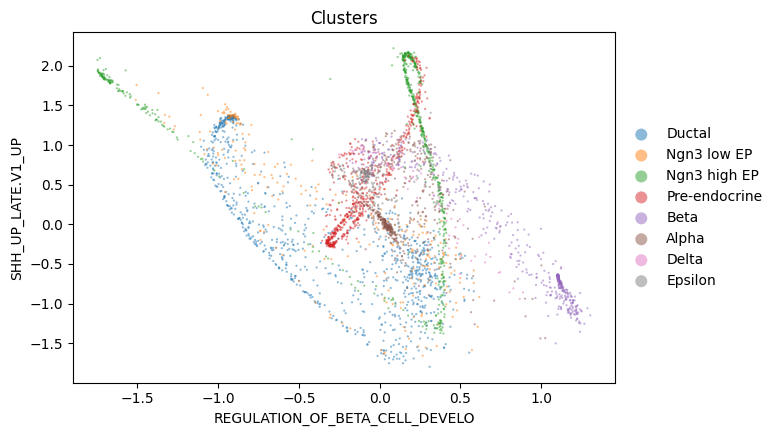

In [ ]:
sc.pl.scatter(adata_gp, x='REGULATION_OF_BETA_CELL_DEVELO',y='SHH_UP_LATE.V1_UP', color='clusters', layers='velocity', size=10, alpha=0.5, title='Clusters')

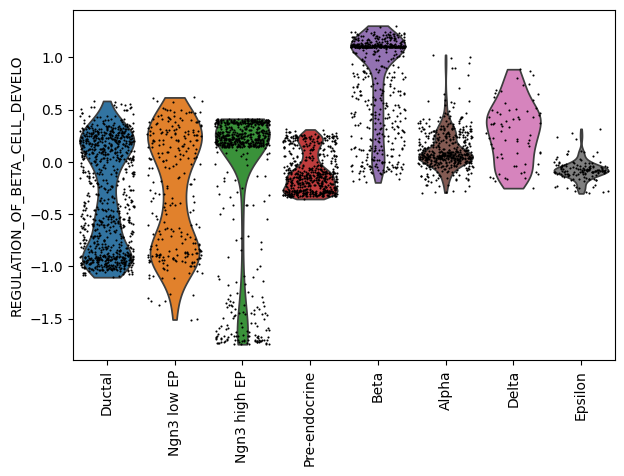

In [ ]:
sc.pl.violin(adata_gp, keys="REGULATION_OF_BETA_CELL_DEVELO", layer='velocity', groupby="clusters", rotation=90, stripplot=True, jitter=0.4, size=1.5)

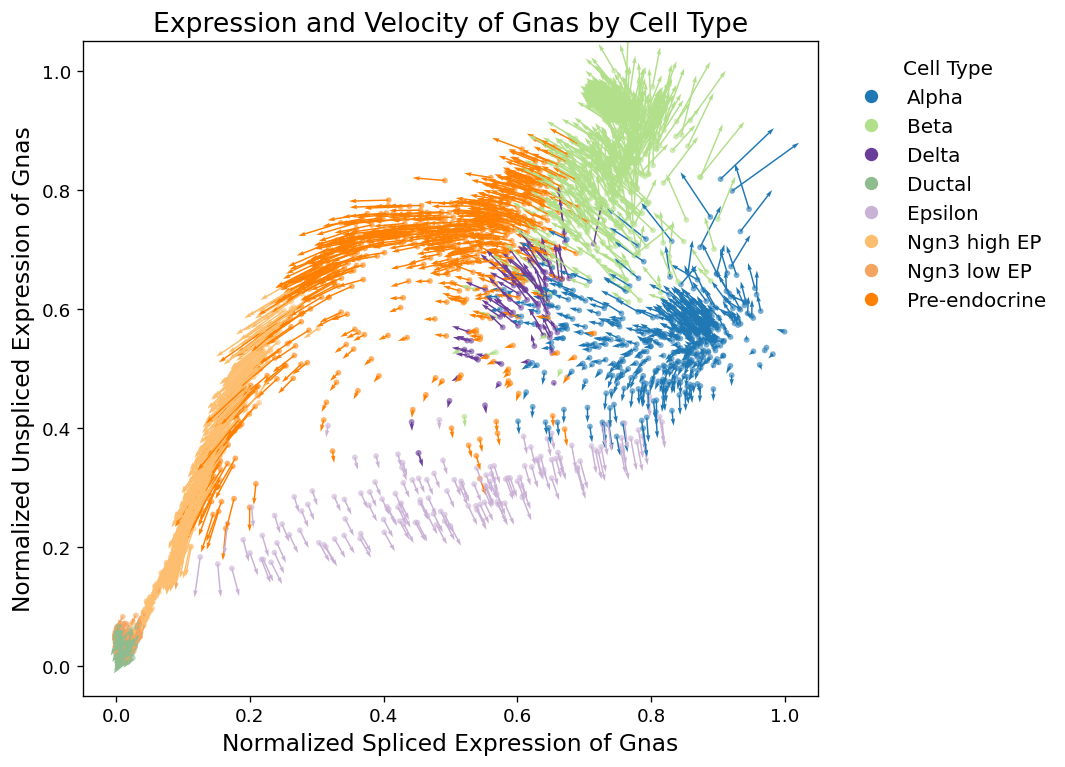

(<Figure size 1080x780 with 1 Axes>,
 <Axes: title={'center': 'Expression and Velocity of Gnas by Cell Type'}, xlabel='Normalized Spliced Expression of Gnas', ylabel='Normalized Unspliced Expression of Gnas'>)

In [ ]:
lineagevi.plots.plot_phase_plane(adata, 'Gnas', u_scale=.1, s_scale=.1, alpha=1, head_width=0.02, head_length=0.03, length_includes_head=False)

In [ ]:
adata_gp

AnnData object with n_obs × n_vars = 3696 × 689
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'Ms', 'z', 'logvar', 'velocity'

In [ ]:
lineagevi.plots.plot_gp_phase_planes(adata_gp, latent_key='mu', velocity_key='velocity', program_pairs=[("CD40_SIGNALING_UP", "E2F3_ONCOGENIC_SIGNATURE")])

KeyError: "Required layer 'mu' missing from adata_gp.layers."

In [25]:
linvi.model.latent_enrich(adata, groups='clusters', comparison='rest', n_sample=5000, key_added='bf_scores')

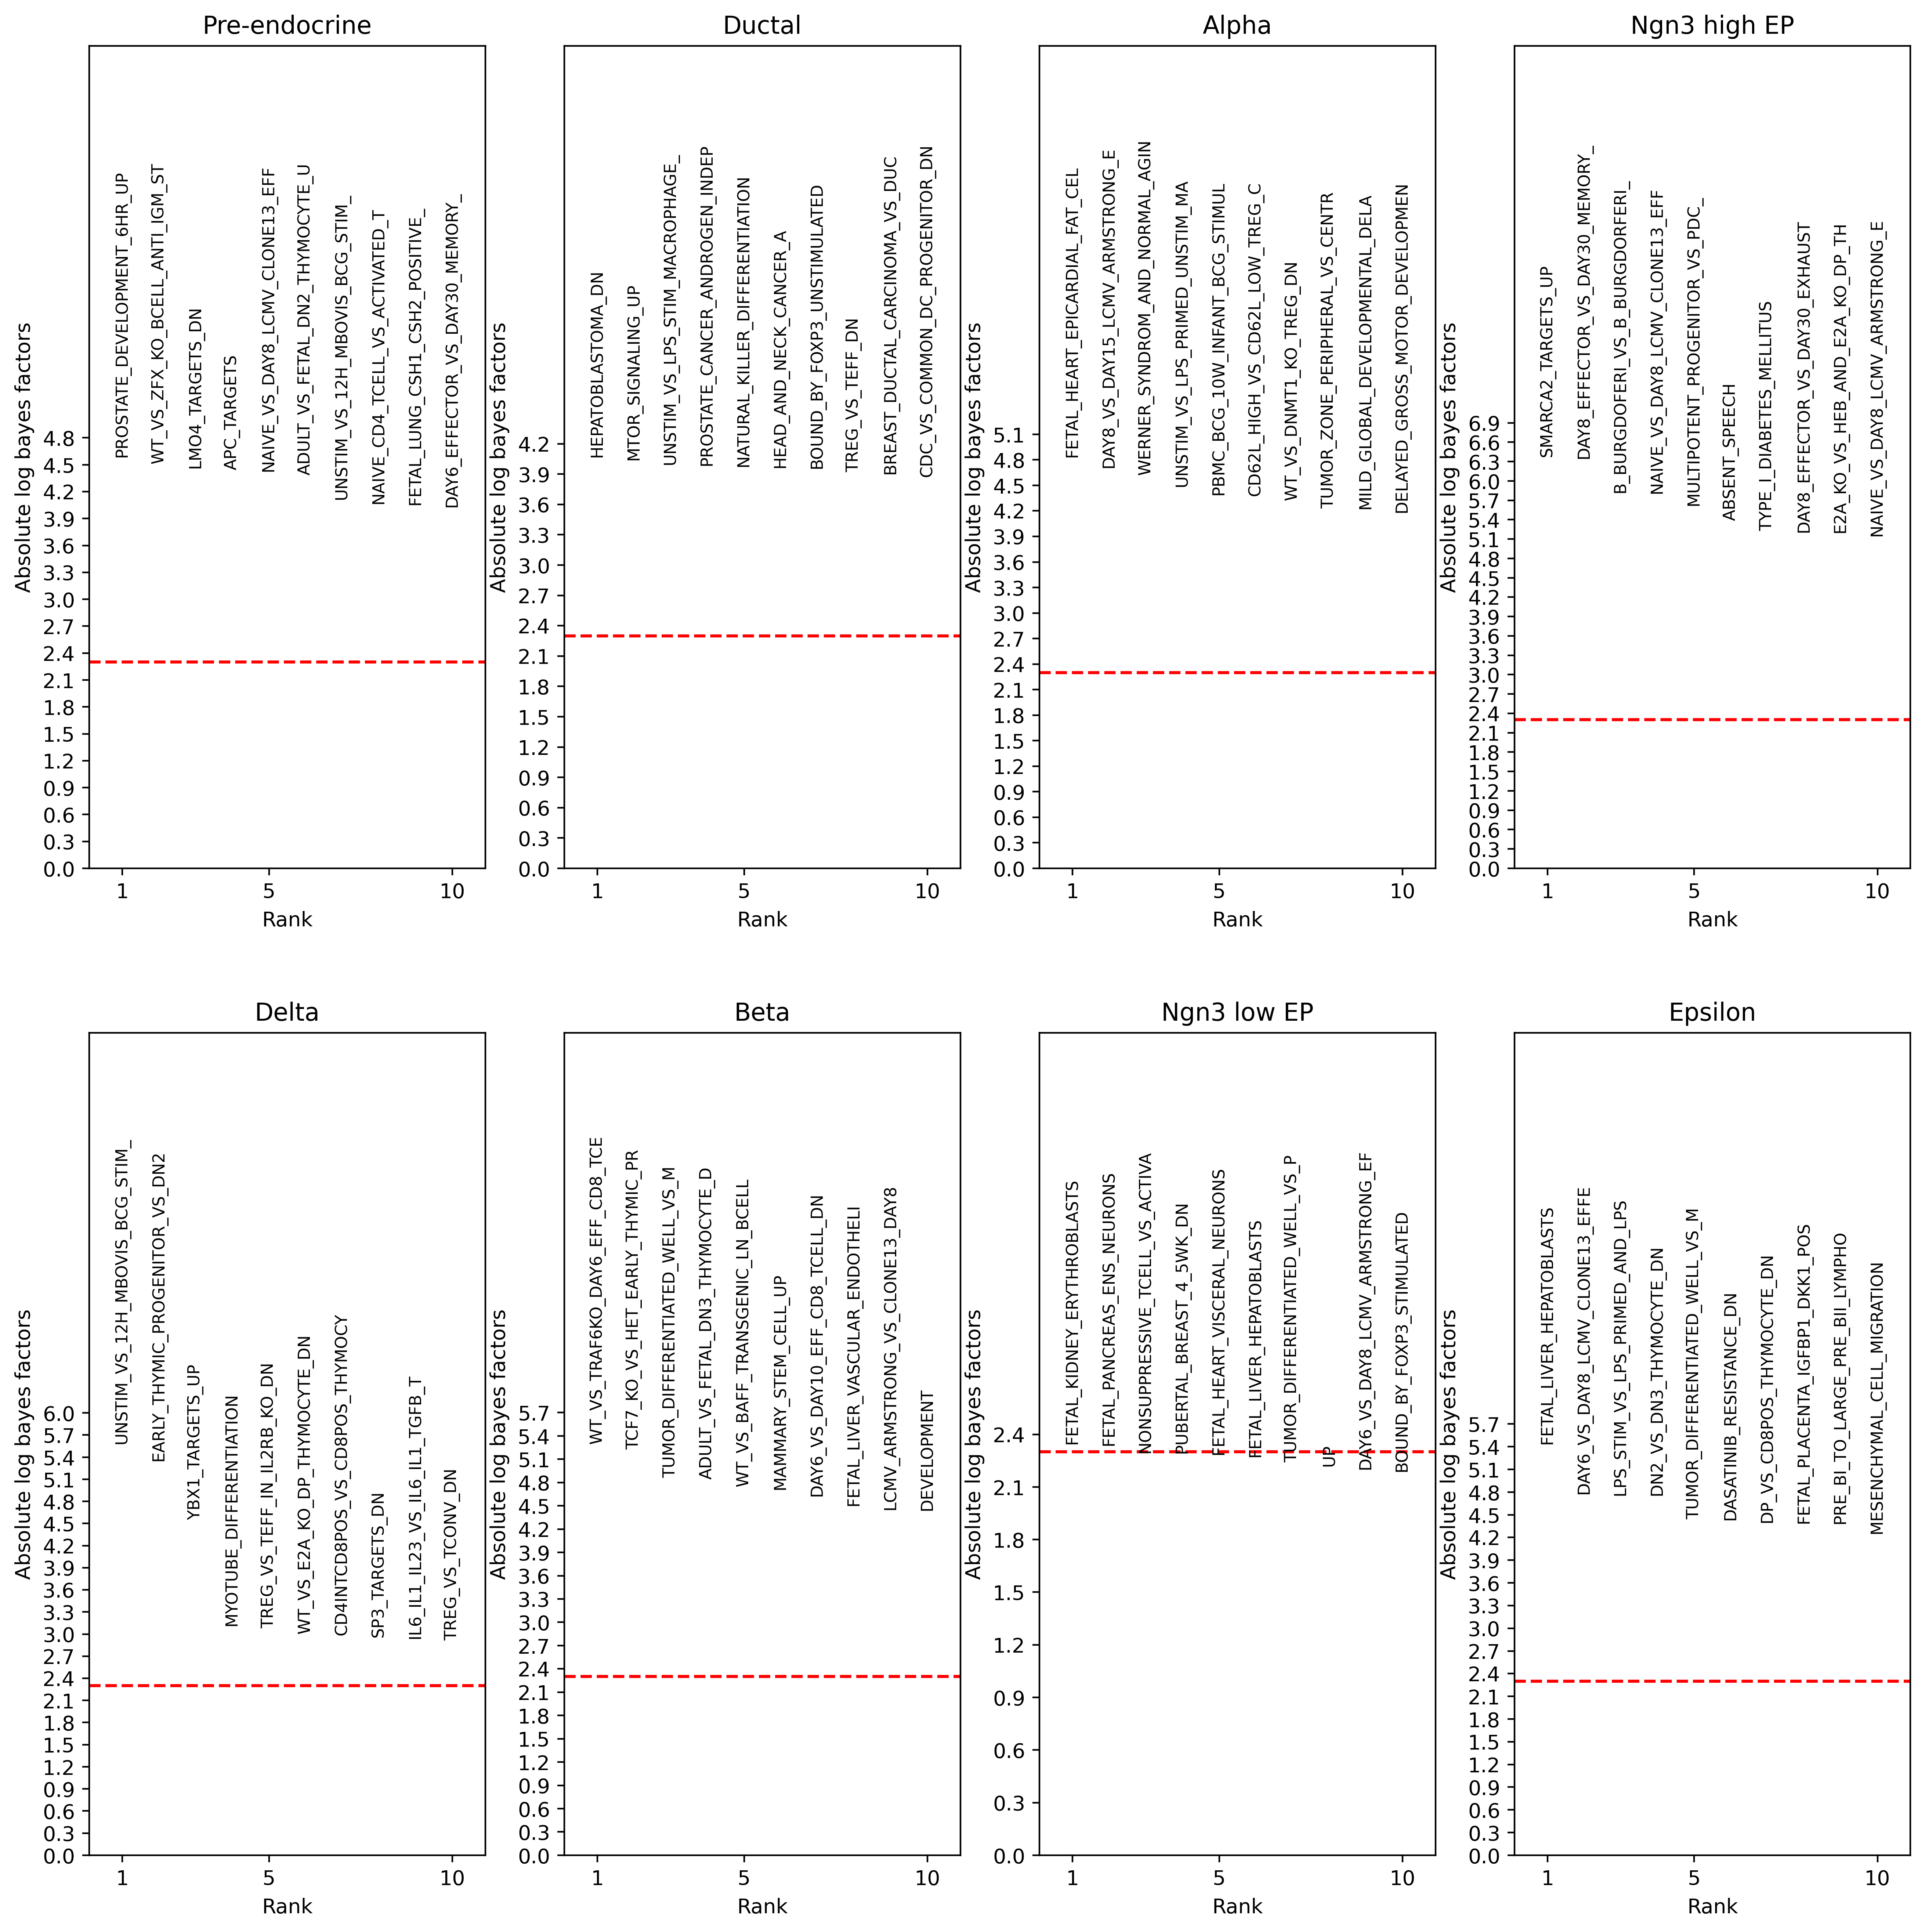

In [26]:
lineagevi.plots.plot_abs_bfs(adata, scores_key='bf_scores', n_cols=4, n_points=10, lim_val=2.3, fontsize=8, scale_y=2, yt_step=0.3,
                    title=None, figsize=None, dpi=400)